In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = 'data/ex5data1.mat'
data = loadmat(data)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [26]:
X = data['X']
y = data['y']
m = y.size
X = np.hstack((np.ones((X.shape[0], 1)), X))
Xtest = data['Xtest']
ytest = data['ytest']
mtest = ytest.size
Xtest = np.hstack((np.ones((Xtest.shape[0], 1)), Xtest))
Xval = data['Xval']
Xval = np.hstack((np.ones((Xval.shape[0], 1)), Xval))
yval = data['yval']

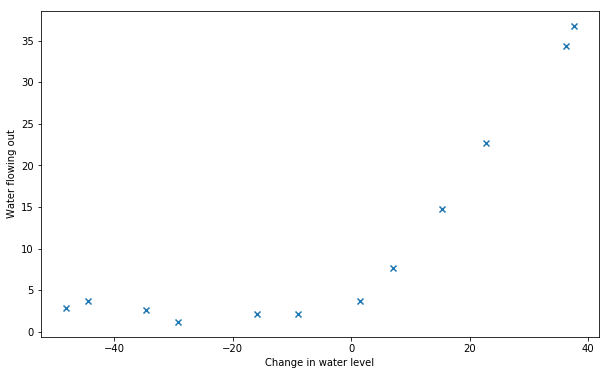

In [9]:
#Plot training data
plt.figure(figsize = (10,6))
plt.scatter(X[:,1], y, marker = 'x')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out')

In [18]:
def linearRegCostFunction(theta, X, y, reg):
    m = y.size
    
    h = X.dot(theta)
    
    J = (1/(2*m))*np.sum(np.square(h-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
   
    return(J)

sklearn linear regression fitting

In [23]:
regr = LinearRegression(fit_intercept=False).fit(X,y)
yPred = regr.predict(X)
print(regr.coef_.shape)

(1, 2)


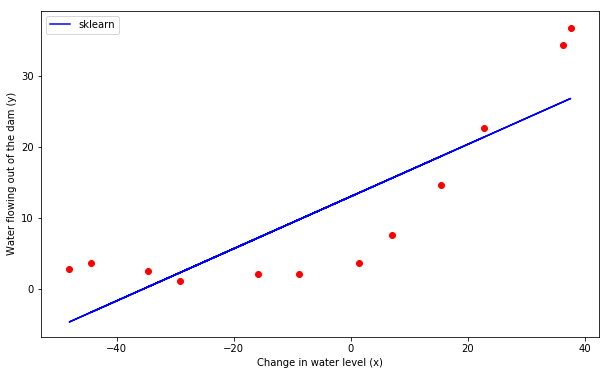

In [20]:
plt.figure(figsize = (10,6))
plt.plot(X[:,1], yPred, c = 'b', label = 'sklearn')
plt.scatter(X[:,1], y, c = 'r')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.legend()

Learning curve

In [27]:
def learningCurve(X, y, Xval, yval, reg):
    m = y.size
    err_train = np.zeros(m)
    err_cv = np.zeros(m)
    
    for i in range(m):
        regr = LinearRegression(fit_intercept=False).fit(X[:i+1,:], y[:i+1])
        theta = regr.coef_.T
        err_train[i], err_cv[i] = linearRegCostFunction(theta, X[:i+1,:], y[:i+1], reg), linearRegCostFunction(theta, Xval, yval, reg)
    return err_train, err_cv

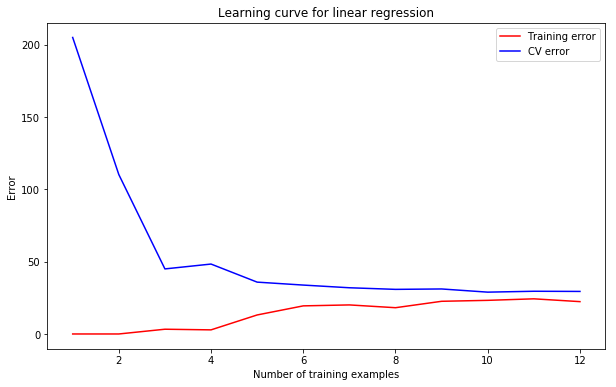

In [31]:
err_train, err_cv = learningCurve(X, y, Xval, yval, 0)
plt.figure(figsize = (10,6))
plt.plot(np.arange(1,m+1), err_train, c = 'r', label = 'Training error')
plt.plot(np.arange(1,m+1), err_cv, c ='b', label = 'CV error')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();